# Time Series Forecasting
# Applying model on 'AvgTemp' data

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
print("Imported Sucessfully")

Imported Sucessfully


In [2]:
#Reading data
data= pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
print("Reading done!")

Reading done!


##### Data Preprocessing

In [3]:
data.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [4]:
data.shape

(1825, 5)

In [5]:
data.isnull().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [6]:
df=data.dropna()

In [7]:
df.shape

(1821, 5)

In [8]:
df.isnull().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [9]:
df.head(10)

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
2014-01-06,22.0,39.0,31.0,658,1759
2014-01-07,28.0,45.0,37.0,658,1759
2014-01-08,30.0,41.0,36.0,659,1800
2014-01-09,29.0,42.0,36.0,659,1801


In [10]:
df['AvgTemp'].describe()

count    1821.000000
mean       46.818781
std         4.143192
min        31.000000
25%        44.000000
50%        47.000000
75%        50.000000
max        57.000000
Name: AvgTemp, dtype: float64

Text(0, 0.5, 'Temperature')

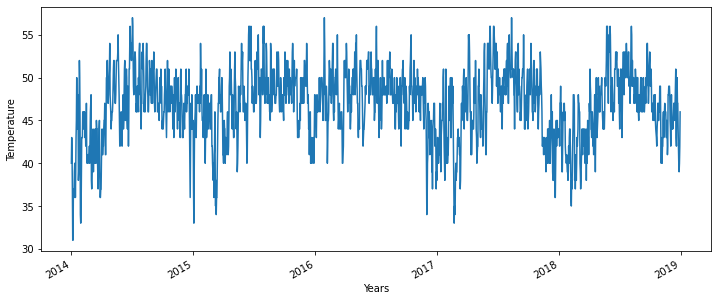

In [11]:
#Plotting Data
df['AvgTemp'].plot(figsize=(12,5))
plt.xlabel('Years')
plt.ylabel('Temperature')

#### Checking data is stationary or not by finding p-value from ADF test

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_series(timeseries):
  
    rolmean= timeseries.rolling(12).mean()
    
    #ploting graphs
    plt.figure(figsize= (15,8))
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolmean, color= 'red', label= 'mean')
    plt.legend()
    plt.show()
    
    print('result of dickey fuller test:')
    dftest= adfuller(timeseries, autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index= ['Test Statistics', 'p-value', '#lags used', 'Number of observation used'])   
    for key, value in dftest[4].items():
         dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

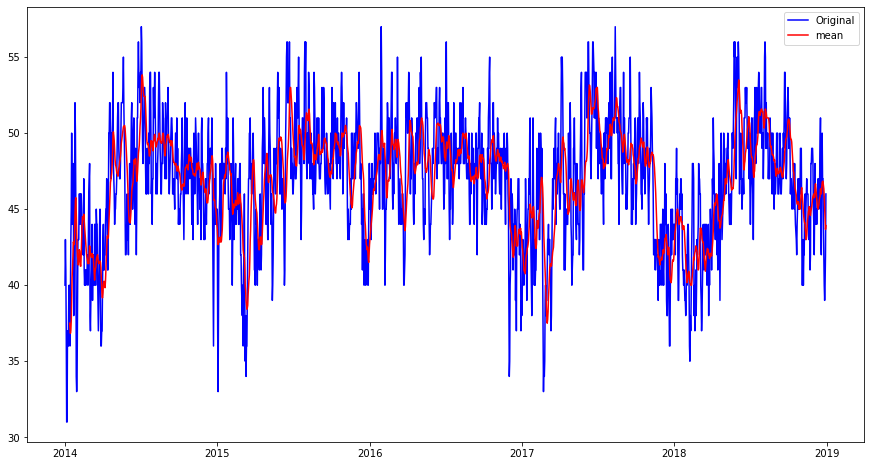

result of dickey fuller test:
Test Statistics              -6.554680e+00
p-value                       8.675937e-09
#lags used                    1.200000e+01
Number of observation used    1.808000e+03
Critical Value (1%)          -3.433972e+00
Critical Value (5%)          -2.863140e+00
Critical Value (10%)         -2.567622e+00
dtype: float64


In [13]:
test_series(df['AvgTemp'])

We can see that p-value<0.05, so the data is stationary.

In [14]:
train_new= df['AvgTemp'][0:1500]
test_new= df['AvgTemp'][1500:1822]

In [15]:
train_new

DATE
2014-01-01    40.0
2014-01-02    43.0
2014-01-03    41.0
2014-01-04    37.0
2014-01-05    31.0
              ... 
2018-02-07    35.0
2018-02-08    38.0
2018-02-09    37.0
2018-02-10    39.0
2018-02-11    42.0
Name: AvgTemp, Length: 1500, dtype: float64

In [16]:
test_new

DATE
2018-02-12    44.0
2018-02-13    48.0
2018-02-14    48.0
2018-02-15    48.0
2018-02-16    47.0
              ... 
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, Length: 321, dtype: float64

In [17]:
df_diff= train_new- train_new.shift(1)

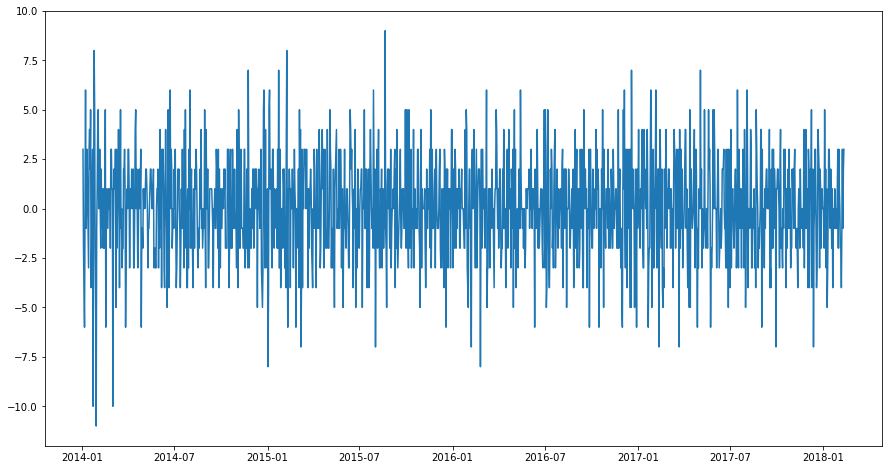

In [18]:
df_diff.dropna(inplace=True)
plt.figure(figsize= (15,8))
plt.plot(df_diff)
plt.show()

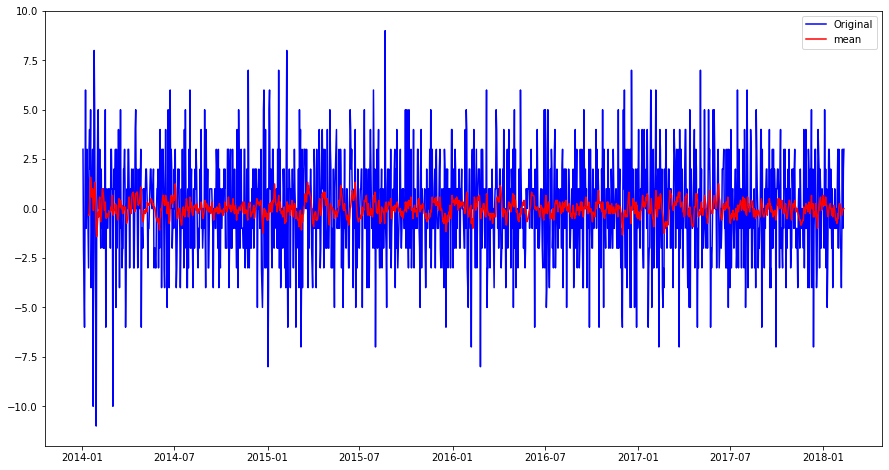

result of dickey fuller test:
Test Statistics              -1.223543e+01
p-value                       1.030763e-22
#lags used                    2.400000e+01
Number of observation used    1.474000e+03
Critical Value (1%)          -3.434794e+00
Critical Value (5%)          -2.863503e+00
Critical Value (10%)         -2.567815e+00
dtype: float64


In [19]:
test_series(df_diff)

After shifting the data, mean is coming around 0 across all data.

#### Plotting the ACF, PACF graph

In [20]:
from statsmodels.tsa.stattools import acf, pacf
a = acf(df['AvgTemp'], nlags=15)
pa = pacf(df['AvgTemp'], nlags=15, method='ols')

Text(0.5, 1.0, 'ACF on original')

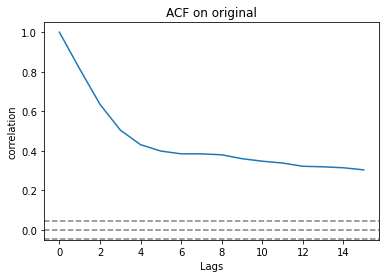

In [21]:
#Plotting graph
plt.plot(a)
plt.xlabel('Lags')
plt.ylabel('correlation')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['AvgTemp'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['AvgTemp'])),linestyle='--',color='gray')
plt.title('ACF on original')

Text(0.5, 1.0, 'ACF on original')

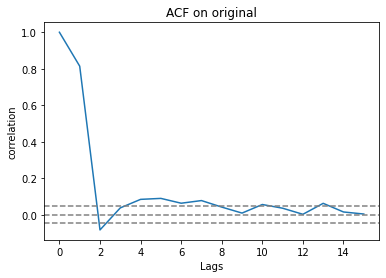

In [22]:
plt.plot(pa)
plt.xlabel('Lags')
plt.ylabel('correlation')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['AvgTemp'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['AvgTemp'])),linestyle='--',color='gray')
plt.title('ACF on original')

In [23]:
ac = acf(df_diff, nlags=15)
pac = pacf(df_diff, nlags=15, method='ols')

Text(0.5, 1.0, 'ACF after shifting')

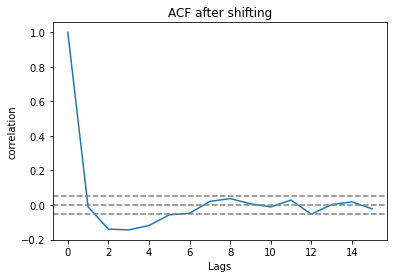

In [24]:
plt.plot(ac)
plt.xlabel('Lags')
plt.ylabel('correlation')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.title('ACF after shifting')

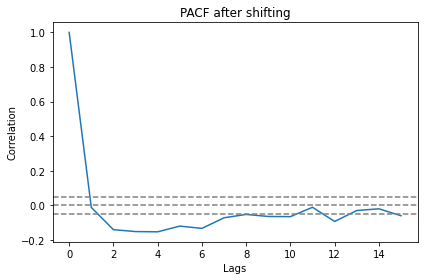

In [25]:
plt.plot(pac)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.title('PACF after shifting')
plt.tight_layout()

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
q – The lag value where the ACF chart crosses the upper confidence interval for the first time.

In [26]:
from pmdarima import auto_arima

In [27]:
stepwise_fit=auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8343.696, Time=2.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.56 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.333, Time=3.16 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.842, Time=3.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.190, Time=2.94 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8311.075, Time=3.83 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.529, Time=3.84 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.457, Time=4.24 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.397, Time=3.93 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.602
Date:                Sun, 03 Jul 2022   AIC                           8295.204
Time:                        20:16:37   BIC                           8339.261
Sample:                             0   HQIC                          8311.457
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2877      0.385      3.343      0.001       0.533       2.043
ar.L1          0.9723      0.008    117.243      0.000       0.956       0.989
ma.L1         -0.1199      0.024     -4.988      0.000      -0.167      -0.073
ma.L2         -0.2165      0.024     -8.869      0.000      -0.264      -0.169
ma.L3         -0.2039      0.024     -8.445      0.000      -0.251      -0.157
ma.L4         -0.1334      0.023     -5.811      0.000      -0.178      -0.088
ma.L5         -0.0482      0.025     -1.964      0.050      -0.096      -0.000
sigma2         5.5376      0.175     31.713      0.000       5.195       5.880
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                20.71
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Importing ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [29]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [30]:
# Implementing ARIMA model
model=ARIMA(df['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

C:\Users\Ankit Kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                     ARMA(1, 5)   Log Likelihood               -4138.130
Method:                       css-mle   S.D. of innovations              2.347
Date:                Sun, 03 Jul 2022   AIC                           8292.261
Time:                        20:16:38   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5293      0.787     59.148      0.000      44.988      48.071
ar.L1.AvgTemp     0.9860      0.006    155.003      0.000       0.974       0.998
ma.L1.AvgTemp    -0.1403      0.024     -5.754      0.000      -0.188      -0.092
ma.L2.AvgTemp    -0.2328      0.024     -9.641      0.000      -0.280      -0.185
ma.L3.AvgTemp    -0.2163      0.025     -8.502      0.000      -0.266      -0.166
ma.L4.AvgTemp    -0.1478      0.023     -6.352      0.000      -0.193      -0.102
ma.L5.AvgTemp    -0.0587      0.024     -2.413      0.016      -0.106      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0142           +0.0000j            1.0142            0.0000
MA.1            1.0867           -0.0000j            1.0867           -0.0000
MA.2            0.0537           -1.8503j            1.8511           -0.2454
MA.3            0.0537           +1.8503j            1.8511            0.2454
MA.4           -1.8566           -1.0630j            2.1394           -0.4172
MA.5           -1.8566           +1.0630j            2.1394            0.4172
-----------------------------------------------------------------------------
"""

In [31]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end)
pred.index=df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.743887
2018-12-02    44.354473
2018-12-03    42.939786
2018-12-04    45.754372
2018-12-05    47.931112
2018-12-06    44.855860
2018-12-07    44.185801
2018-12-08    45.287611
2018-12-09    44.513116
2018-12-10    45.375290
2018-12-11    46.014796
2018-12-12    46.747012
2018-12-13    46.597016
2018-12-14    44.852552
2018-12-15    45.981255
2018-12-16    46.833576
2018-12-17    48.397350
2018-12-18    49.771660
2018-12-19    42.706939
2018-12-20    42.796204
2018-12-21    48.366818
2018-12-22    49.511925
2018-12-23    46.341854
2018-12-24    46.404925
2018-12-25    44.216123
2018-12-26    43.067340
2018-12-27    41.607957
2018-12-28    40.981623
2018-12-29    41.968459
2018-12-30    43.435072
dtype: float64


In [32]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

2.3263436939186266
